**Complete Modeling for Subgroup 3 - Performed by Aditya Kumaran**

I pledge my honor that I have abided by the Stevens Honor System.

In [107]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
import joblib


In [108]:
#Loading the Subgroup 3 Data

data = pd.read_csv("/Users/wugaoyi/Learning/cs559/cs559_Final_Project/data/subgroub3")
data.head()

data.shape




(2163, 98)

**Preprocessing**

*Goal is to perform feature reduction and have total features < 50*

In [109]:
#Dropping "Bankrupt" and "Index" columns

y = data["Bankrupt?"]

data = data.drop(["Bankrupt?", "Index", "cluster"], axis = 1)
data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,0.476332,0.534507,0.526581,0.610985,0.609183,0.999041,0.797381,0.809312,0.303359,0.781570,...,0.796531,0.000552,0.623563,0.610984,0.840085,0.279004,0.044600,0.569915,1,0.032626
2,0.514113,0.566779,0.565341,0.613312,0.613312,0.999154,0.797618,0.809497,0.303536,0.781770,...,0.815698,0.003068,0.624210,0.613313,0.841336,0.277518,0.026847,0.565411,1,0.044359
3,0.474918,0.533689,0.529739,0.601976,0.601976,0.998962,0.797381,0.809315,0.303524,0.781567,...,0.796865,0.003257,0.623103,0.601978,0.840101,0.277650,0.037217,0.569733,1,0.042841
4,0.442500,0.507196,0.494941,0.598906,0.598812,0.998927,0.797298,0.809236,0.303453,0.781484,...,0.780905,0.009173,0.624087,0.598903,0.838903,0.278959,0.026643,0.564335,1,0.032862


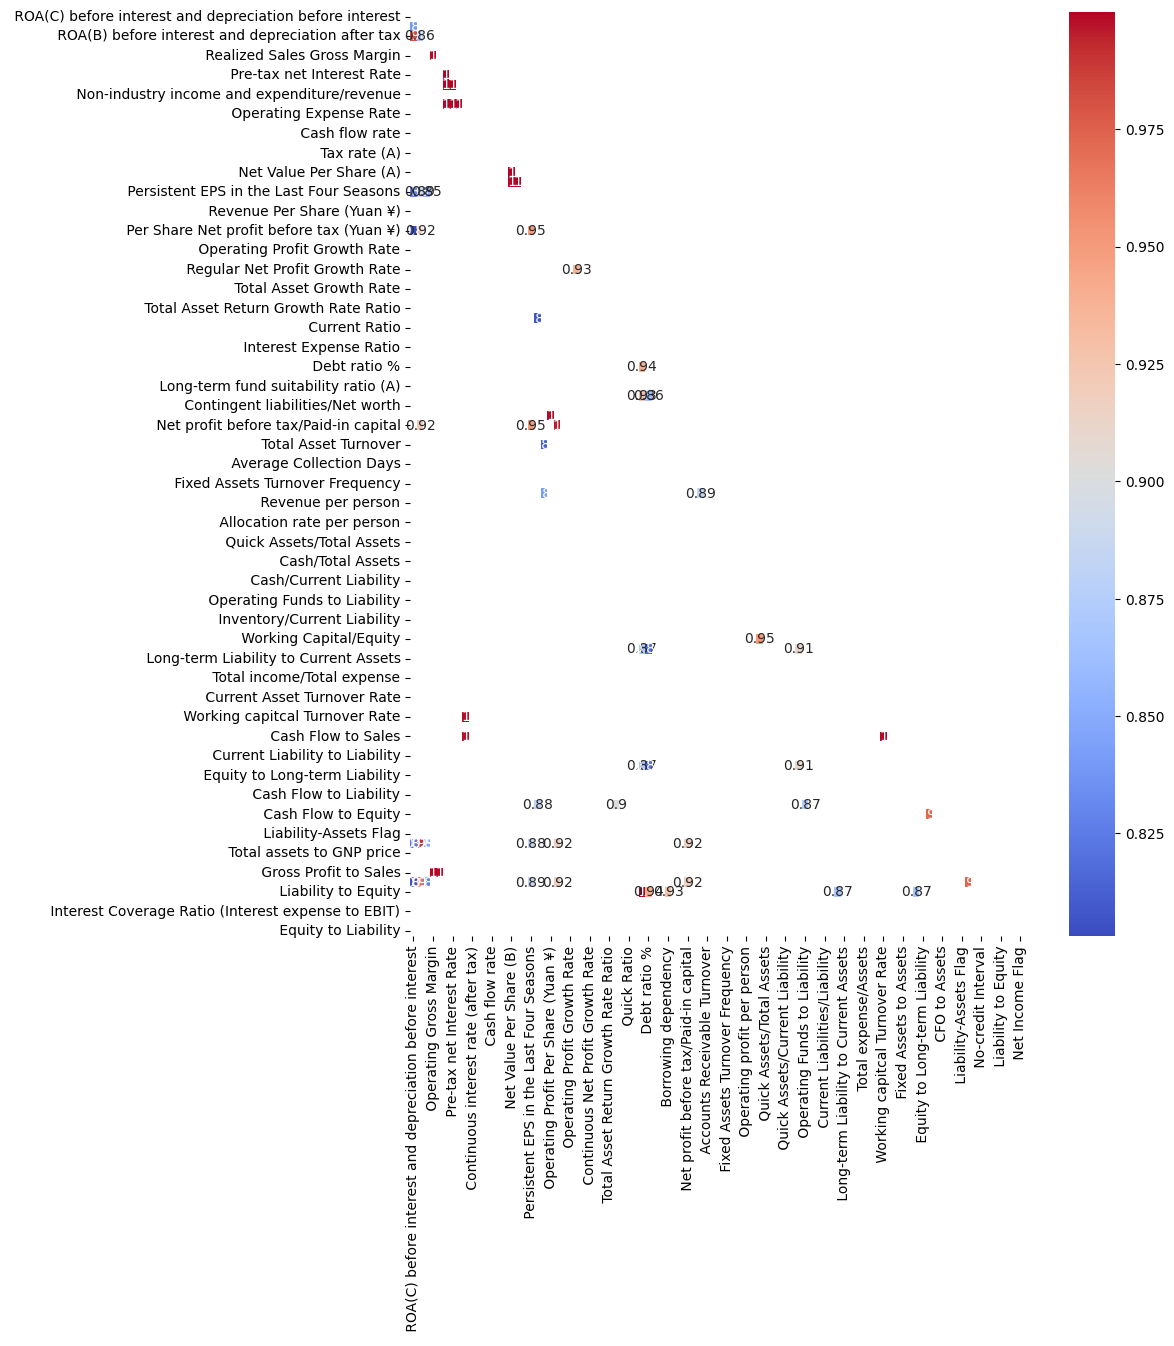

In [110]:
#Correlation Matrix showing correlations > .80

corr_matrix = data.corr()

threshold = 0.8
strong_corr = corr_matrix[(corr_matrix >= threshold) & (corr_matrix < 1.0)]

plt.figure(figsize = (10,12))
mask = np.triu(np.ones_like(strong_corr, dtype=bool))
sns.heatmap(strong_corr, mask=mask, cmap = 'coolwarm', annot = True)
plt.show()

In [111]:
# Compute correlation matrix
corr_matrix = data.corr().abs()

# Keep only upper triangle to avoid duplicate pairs (and self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation above threshold
threshold = 0.8
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Sort by correlation (descending)
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

high_corr_pairs

#saving pairs to colab for easier viewing
high_corr_pairs.to_csv('./high_corr_pairs.csv', index=False)


In [112]:
#removing features with high correlations

data = data.drop([" Debt ratio %", " Current Liability to Equity", " Current Liability to Liability", " Operating Gross Margin", " After-tax net Interest Rate", " Continuous interest rate (after tax)", " Working capitcal Turnover Rate", " Net Value Per Share (B)", " Net Value Per Share (C)", " Operating profit/Paid-in capital", " Operating Profit Rate", " Realized Sales Gross Margin", " Net profit before tax/Paid-in capital", " ROA(C) before interest and depreciation before interest", " ROA(A) before interest and % after tax", " Net Income to Stockholder's Equity", " Cash Flow to Equity", " Net worth/Assets", " After-tax Net Profit Growth Rate", " Borrowing dependency", " Net Income to Total Assets", " Current Liability to Assets", " Cash Reinvestment %", " Net Worth Turnover Rate (times)", " Cash Flow Per Share", " Operating Funds to Liability", " Total debt/Total net worth", " Liability to Equity", " Total Asset Turnover"], axis = 1)

print(data.shape, "-> we have reduced it to 66 features.")


(2163, 66) -> we have reduced it to 66 features.


In [113]:
#visualizing variance (we want to remove features with really low relative variance)

variance_table = data.var()
variance_table = variance_table.apply(lambda x: f"{x:.6f}")
variance_table = variance_table.sort_values(ascending = True)

print(variance_table)

high_corr_pairs.to_csv('./high_corr_pairs.csv', index=False) #for easier viewing in CoLab

Total Asset Return Growth Rate Ratio                       0.000000
Net Income Flag                                            0.000000
Net Value Growth Rate                                      0.000000
Liability-Assets Flag                                      0.000000
Continuous Net Profit Growth Rate                          0.000000
                                                    ...            
Total Asset Growth Rate                  5936067818008076288.000000
Interest-bearing debt interest rate         6303962687997548.000000
Research and development expense rate    6407832628062275584.000000
Cash Turnover Rate                       8489116896519538688.000000
Current Asset Turnover Rate              9292330605989634048.000000
Length: 66, dtype: object


In [114]:
#drop all features with variance lower than 0.0001

threshold = 0.0001
variance_below_threshold = []

for column in data.columns:
    if data[column].var() < threshold:
        variance_below_threshold.append(column)


data = data.drop(variance_below_threshold, axis = 1)
print(data.shape, "-> we have reduced it to 47 features.")

(2163, 47) -> we have reduced it to 47 features.


In [115]:
#saving the features in a list for pickle later
feature_names = data.columns.tolist()

print(feature_names)
print(len(feature_names))

[' ROA(B) before interest and depreciation after tax', ' Pre-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (A)', ' Persistent EPS in the Last Four Seasons', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Growth Rate', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Cash/Current Liability', ' Inventory/Working Capital', ' Inventory/Current Liability', ' Current Liabilities/Liability', ' 

In [116]:
#Final Step: Let's apply PCA and try 35 features

#scale data
scaler = StandardScaler()


X_scaled = scaler.fit_transform(data)

#apply pca
pca = PCA(n_components=35)
data = pca.fit_transform(X_scaled)

print("Original Shape: ", X_scaled.shape)
print("PCA Shape: ", data.shape)

print("Total explained variance by 35 components: ", round(sum(pca.explained_variance_ratio_), 3))

Original Shape:  (2163, 47)
PCA Shape:  (2163, 35)
Total explained variance by 35 components:  0.951


# **Base Models Training + Stacking**

Training the base models and combining them using stacking.

# **Base Models selected (and reasoning)**


**K-Nearest Neighbors (KNN)**

Strength: Captures local structure, very intuitive.

Weakness: Sensitive to noisy data and irrelevant features.

Contribution to Ensemble: Provides local voting perspective, which differs from tree-based or kernel methods.

**Random Forest**

Strength: Handles high-dimensional data well, robust to noise, feature importance is useful.

Weakness: Can be biased if features are highly correlated.

Contribution to Ensemble: Captures complex interactions and feature importance, often performs well out-of-the-box.

**Support Vector Machine with RBF Kernel (SVM-RBF)**

Strength: Great for high-dimensional, non-linear decision boundaries.

Weakness: Computationally expensive for large datasets, sensitive to hyperparameters.

Contribution to Ensemble: Adds a smooth, margin-maximizing classifier that complements the greedy splits of trees and the instance-based nature of KNN.

In [117]:
#Making an accuracy score function

def class_accuracy_score(y_test, y_pred):
  correct = 0
  incorrect = 0

  for yt, yp in zip(y_test, y_pred):
    if yt == yp:
      correct += 1
    else:
      incorrect += 1

  if correct + incorrect == 0:
    return 0
  else:
    return correct / (correct + incorrect)

In [118]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [119]:
#Applying SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [120]:
#Training the base models
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = None)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)


knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)


svm_rbf_clf = svm.SVC(kernel='rbf')
svm_rbf_clf.fit(X_train, y_train)
svm_rbf_y_pred = svm_rbf_clf.predict(X_test)

#Getting predictions on the train data
rf_train_pred = rf_clf.predict(X_train)
knn_train_pred = knn_clf.predict(X_train)
svm_train_pred = svm_rbf_clf.predict(X_train)

#Printing Some Statistics
num_bankrupt_real = 0
num_not_bankrupt_real = 0

for i in y_test:
  if i == 1:
    num_bankrupt_real += 1
  else:
    num_not_bankrupt_real += 1


print("Number of Bankrupts in Test Data: ", num_bankrupt_real)
print("Number of Not Bankrupts in Test Data: ", num_not_bankrupt_real)


num_bankrupt = 0
num_not_bankrupt = 0

for i in rf_y_pred:
  if i == 1:
    num_bankrupt += 1
  else:
    num_not_bankrupt += 1

print("Num Bankrupt predicted by RF: ", num_bankrupt)


num_bankrupt_1 = 0
num_not_bankrupt_1 = 0

for i in knn_y_pred:
  if i == 1:
    num_bankrupt_1 += 1
  else:
    num_not_bankrupt_1 += 1

print("Num Bankrupt predicted by KNN: ", num_bankrupt_1)


num_bankrupt_2 = 0
num_not_bankrupt_2 = 0

for i in svm_rbf_y_pred:
  if i == 1:
    num_bankrupt_2 += 1
  else:
    num_not_bankrupt_2 += 1

print("Num Bankrupt predicted by SVM: ", num_bankrupt_2)

#Accuracy Scores for Train/Test
rf_accuracy_score_test = class_accuracy_score(y_test, rf_y_pred)
knn_accuracy_score_test = class_accuracy_score(y_test, knn_y_pred)
svm_rbf_accuracy_score_test = class_accuracy_score(y_test, svm_rbf_y_pred)

rf_accuracy_score_train = class_accuracy_score(y_train, rf_train_pred)
knn_accuracy_score_train = class_accuracy_score(y_train, knn_train_pred)
svm_rbf_accuracy_score_train = class_accuracy_score(y_train, svm_train_pred)

#Reporting the Accuracy Scores
print()

print("Random Forest Accuracy Train:", rf_accuracy_score_train)
print("KNN Accuracy Train:", knn_accuracy_score_train)
print("SVM-RBF Accuracy Train:", svm_rbf_accuracy_score_train)

print()

print("Random Forest Accuracy Test:", rf_accuracy_score_test)
print("KNN Accuracy Test:", knn_accuracy_score_test)
print("SVM-RBF Accuracy Test:", svm_rbf_accuracy_score_test)

Number of Bankrupts in Test Data:  10
Number of Not Bankrupts in Test Data:  423
Num Bankrupt predicted by RF:  7
Num Bankrupt predicted by KNN:  53
Num Bankrupt predicted by SVM:  28

Random Forest Accuracy Train: 1.0
KNN Accuracy Train: 0.9672813801308745
SVM-RBF Accuracy Train: 0.9824509220701964

Random Forest Accuracy Test: 0.9607390300230947
KNN Accuracy Test: 0.8729792147806005
SVM-RBF Accuracy Test: 0.9214780600461894


In [121]:
#Calculating Confusion Matrix for all Base Models

rf_cm = confusion_matrix(y_test, rf_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)
svm_rbf_cm = confusion_matrix(y_test, svm_rbf_y_pred)

print("Random Forest Confusion Matrix")
print(rf_cm)

print()

print("KNN Confusion Matrix")
print(knn_cm)

print()

print("SVM-RBF Confusion Matrix")
print(svm_rbf_cm)

Random Forest Confusion Matrix
[[416   7]
 [ 10   0]]

KNN Confusion Matrix
[[374  49]
 [  6   4]]

SVM-RBF Confusion Matrix
[[397  26]
 [  8   2]]


In [122]:
#Building the Stacking Model

base_learners = [
    ('rf', RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = None)),
    ('knn', KNeighborsClassifier(n_neighbors = 3)),
    ('svm', svm.SVC(kernel='rbf', probability=True))
]

meta_learner = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,  # cross-validation on base learner predictions
    passthrough=True
)

stacking_clf.fit(X_train, y_train)
stacking_train_pred = stacking_clf.predict(X_train)
stacking_test_pred = stacking_clf.predict(X_test)

#Reporting Accuracy Scores
stacking_accuracy_score_train = class_accuracy_score(y_train, stacking_train_pred)
stacking_accuracy_score_test = class_accuracy_score(y_test, stacking_test_pred)

print("Stacking Accuracy Train:", stacking_accuracy_score_train)
print("Stacking Accuracy Test:", stacking_accuracy_score_test)


#Reporting Confusion Matrix
stacking_cm = confusion_matrix(y_test, stacking_test_pred)
print()
print("Confusion Matrix")
print(stacking_cm)

Stacking Accuracy Train: 1.0
Stacking Accuracy Test: 0.9722863741339491

Confusion Matrix
[[421   2]
 [ 10   0]]


In [123]:
#saving scaler, model, and pca
joblib.dump(stacking_clf, './best_stack_model.pkl')
joblib.dump(pca, './pca.pkl')
joblib.dump(scaler, './scaler.pkl')
joblib.dump(feature_names, './feature_names.pkl')

print("Stacking model, PCA model, feature names, and scaler saved!")


Stacking model, PCA model, feature names, and scaler saved!
